In [1]:
import pandas as pd
import numpy as np

import plotly

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from scipy.stats import f_oneway
from scipy.stats import kruskal
import warnings
warnings.filterwarnings("ignore")

In [2]:
# .xlsx dosyasını dataframe olarak okur : 

df = pd.read_excel("train_5.xlsx")

# analiz edilmeyecek tarih belirten kolonları dataframe içerisinden siler : 

df = df.drop(["SAYAC_TAKILMA_TARIHI", "SAYAC_BITIS_TARIHI", "SAYAC_BASLANGIC_TARIHI","SAYAC_YAPIM_YILI"], axis = 1)

In [3]:
# dataframe içerisindeki değişken tiplerini gösterir : 

df.dtypes

TUKETIM_M1            float64
TUKETIM_M2            float64
TUKETIM_M3            float64
TUKETIM_M4            float64
TUKETIM_M5            float64
TUKETIM_M6            float64
TUKETIM_M7            float64
TUKETIM_M8            float64
TUKETIM_M9            float64
TUKETIM_M10           float64
TUKETIM_M11           float64
TUKETIM_M12           float64
TUKETIM_M13           float64
TUKETIM_M14           float64
TUKETIM_M15           float64
TUKETIM_M16           float64
TUKETIM_M17           float64
TUKETIM_M18           float64
TUKETIM_M19           float64
TUKETIM_M20           float64
TUKETIM_M21           float64
TUKETIM_M22           float64
TUKETIM_M23           float64
TUKETIM_M24           float64
DEMAND_M1             float64
DEMAND_M2             float64
DEMAND_M3             float64
DEMAND_M4             float64
DEMAND_M5             float64
DEMAND_M6             float64
DEMAND_M7             float64
DEMAND_M8             float64
DEMAND_M9             float64
DEMAND_M10

In [4]:
# dataframe içerisindeki değişkenlerin özet istatistiklerini gösterir : 
df.describe()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,SOB_RISK_SKORU,SOKAK_RISK_SKORU,MAHALLE_RISK_SKORU,SAYAC_MALZEME_ID,NK_FLAG
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,12243.000000,13766.000000,12242.000000,13692.000000,11825.000000,15000.000000,15000.000000,15000.000000,1.495000e+04,15000.000000
mean,96.208479,205.978455,223.982149,217.158467,183.984799,184.405282,215.505007,248.644492,232.900504,205.188164,...,2.434009,2.298214,2.584867,2.652326,4.903145,0.012733,0.015385,0.015423,8.000066e+07,0.068000
std,423.739447,806.797729,562.430605,1388.820828,1311.605920,1063.798858,1162.260886,1100.215516,1112.950045,1337.520990,...,2.084839,1.916677,2.020813,6.961637,204.339999,0.026829,0.135404,0.062241,3.202995e+02,0.251754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+07,0.000000
25%,18.663720,67.464279,72.497774,71.253761,70.489054,72.638329,78.729780,81.960615,77.956021,74.530854,...,1.084000,1.044000,1.480000,1.376000,1.592000,0.001531,0.000000,0.002672,8.000071e+07,0.000000
50%,57.967004,147.897623,156.901631,152.988106,136.929436,138.537125,151.135455,167.395119,156.945536,144.954876,...,2.268000,2.160000,2.372000,2.304000,2.624000,0.005666,0.000000,0.006691,8.000073e+07,0.000000
75%,119.764778,244.215963,267.343281,251.375305,203.995790,201.954775,238.281348,288.195682,261.602692,224.807583,...,3.356000,3.120000,3.384000,3.380000,4.096000,0.013746,0.010340,0.013659,8.000096e+07,0.000000
max,47318.985000,90851.355000,47803.770000,162381.240000,111955.470968,95467.680000,110822.519806,112852.579355,98479.082839,142768.472000,...,56.088000,48.259000,43.868000,777.215000,22222.000000,1.127251,14.264706,4.208696,8.000103e+07,1.000000


In [5]:
# varyans testi analizi (ANOVA):
## iki veya daha fazla bağımsız örneğin ortalamalarının önemli ölçüde farklı olup olmadığını test eder : 
## kaçak ve normal tüketim değerlerini ayırıp 24 aylık ortalama değerleri için anova testi:

theft = df[df['NK_FLAG']==1]
normal = df[df['NK_FLAG']==0]

mean_theft = round(theft.iloc[::,:24:].T.mean())
mean_normal = round(normal.iloc[::,:24:].T.mean())

stat, p = f_oneway(mean_theft, mean_normal)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('Benzer Dağılıma Sahip olabilirler')
else:
	print('Farklı Dağılıma Sahip olabilirler')


stat=71.025, p=0.000
Farklı Dağılıma Sahip olabilirler


In [6]:
# kruskal-wallis h testi:
## iki veya daha fazla bağımsız örneğin dağılımlarının eşit olup olmadığını test eder:
## kaçak ve normal tüketim değerlerini ayırıp 24 aylık ortalama değerleri için kruskal-wallis testi:

stat, p = kruskal(mean_theft, mean_normal)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Benzer Dağılıma Sahip olabilirler')
else:
	print('Farklı Dağılıma Sahip olabilirler')


stat=20.051, p=0.000
Farklı Dağılıma Sahip olabilirler


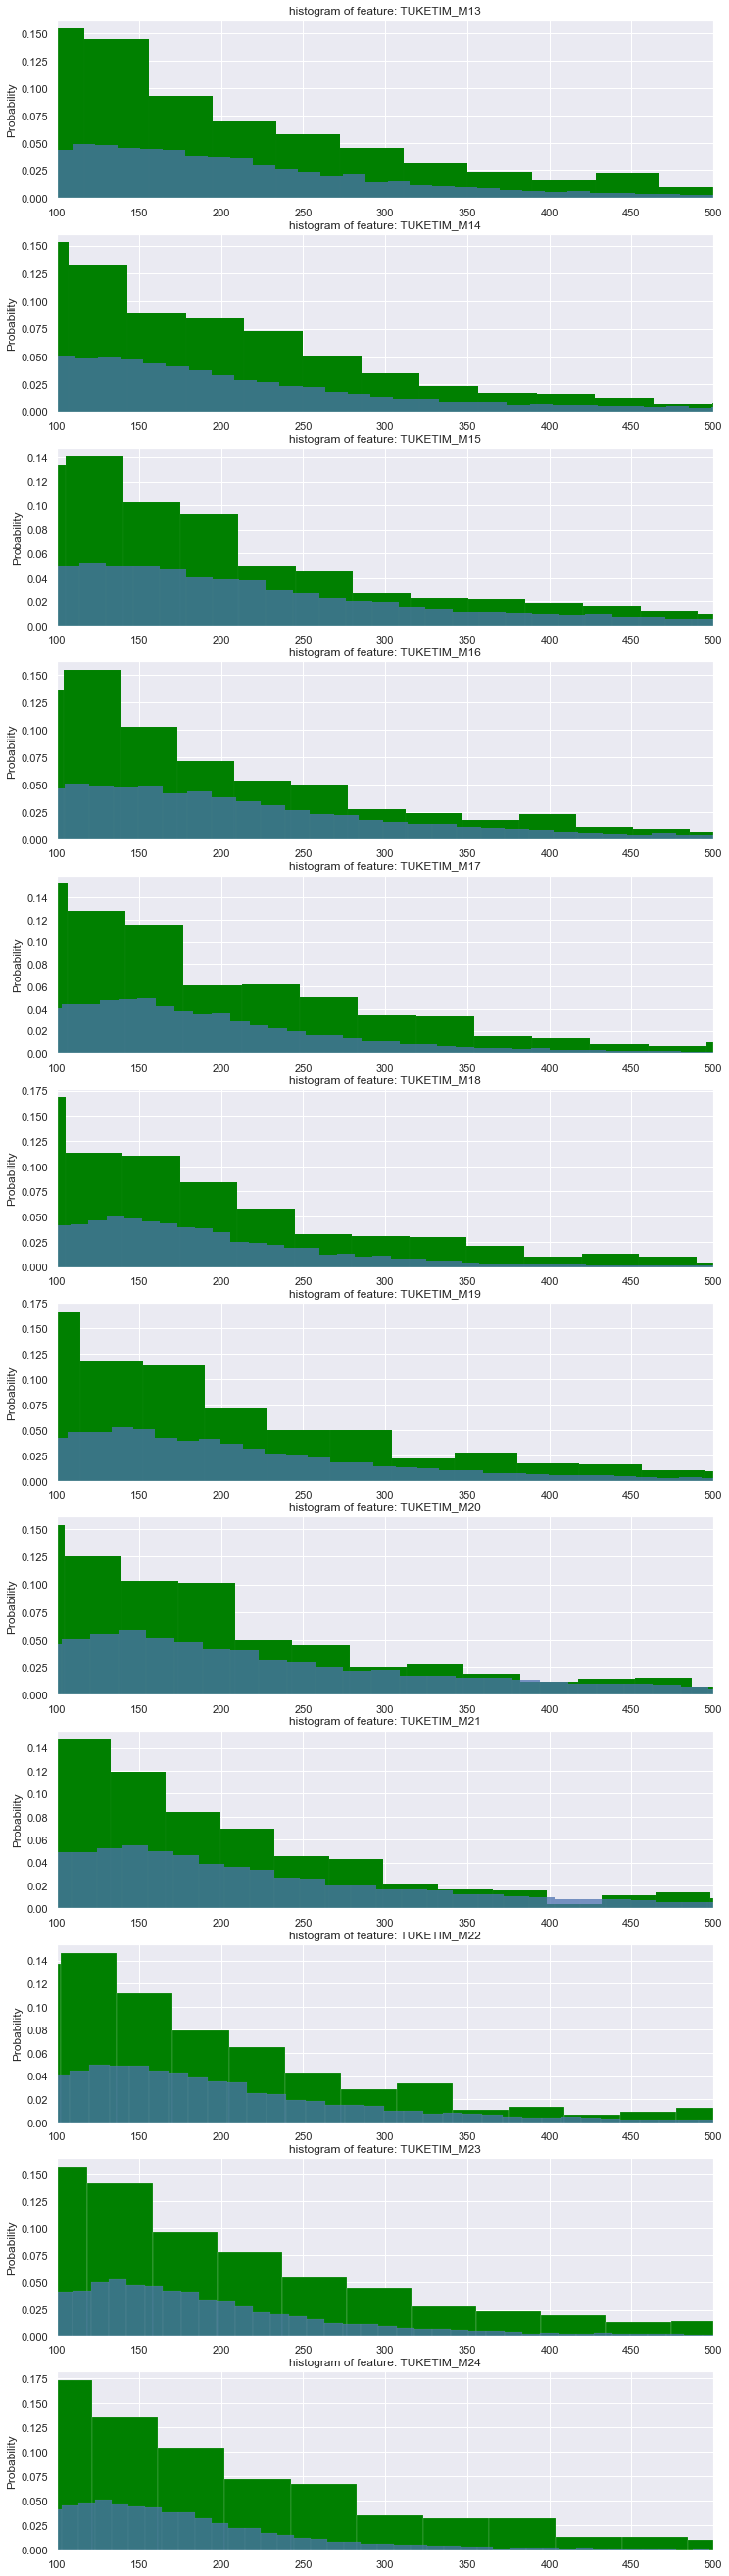

In [7]:
# tüketim m13-m24 arası için tüketimlerin normal ve kaçaklara göre yüzdesel dağılımı : 
# yeşiller kaçak , maviler normal tüketimleri temsil etmektedir 

features = df.iloc[:,12:24].columns

plt.figure(figsize=(12,44*4))
gs = gridspec.GridSpec(44, 1)
sns.set(style="darkgrid")

for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[c][df.NK_FLAG == 1],facecolor='green',stat='probability', alpha=0.5)
    sns.histplot(df[c][df.NK_FLAG == 0],stat='probability')
    ax.set(xlim=(100, 500))
    ax.set_xlabel("")
    ax.set_title("histogram of feature: " + str(c))

plt.show()

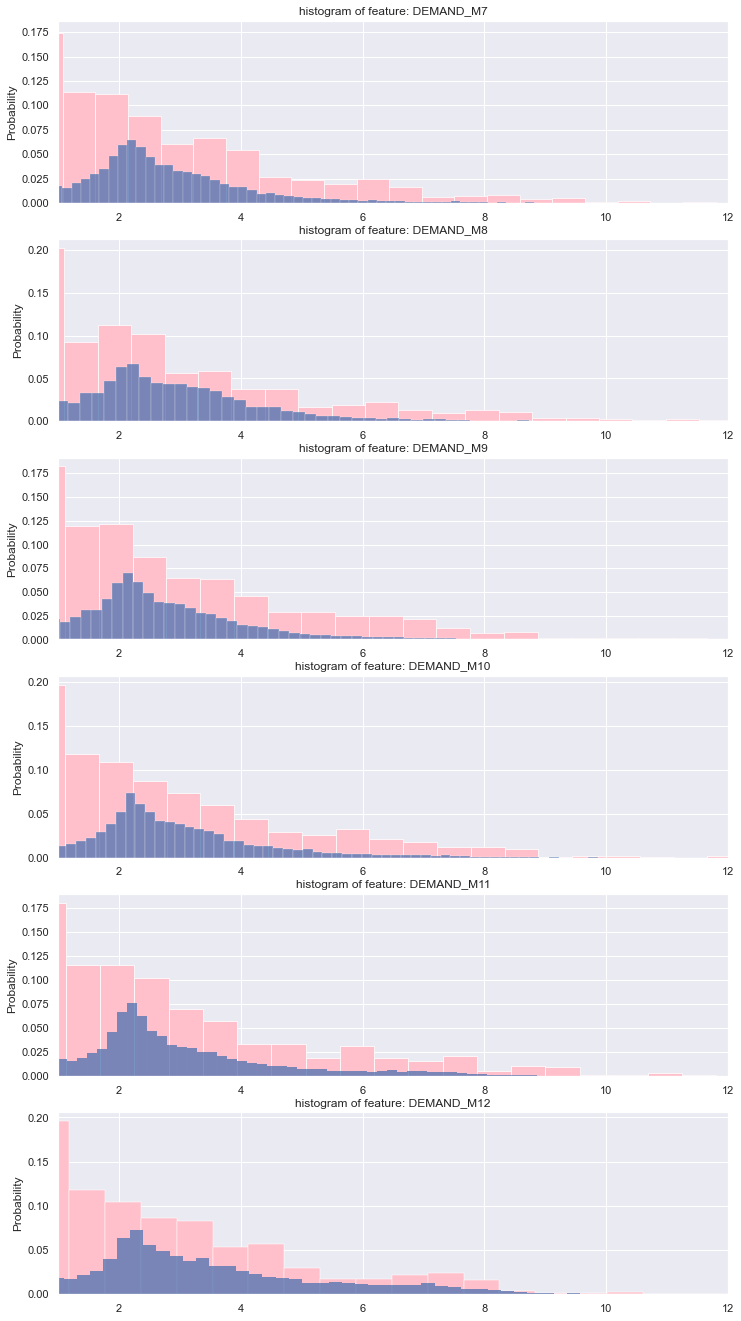

In [8]:
# demand'ların son 6 ay değerlerinin normal ve kaçaklara göre yüzdesel dağılımı : 
# pembeler kaçak , maviler normal demand değerlerini temsil etmektedir 

features = df.iloc[:,30:36].columns
plt.figure(figsize=(12,44*4))
gs = gridspec.GridSpec(44, 1)
sns.set(style="darkgrid")

for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[c][df.NK_FLAG == 1],facecolor='pink',stat='probability')
    sns.histplot(df[c][df.NK_FLAG == 0],stat='probability')
    ax.set(xlim=(1, 12))
    ax.set_xlabel("")
    ax.set_title("histogram of feature: " + str(c))
    
plt.show()

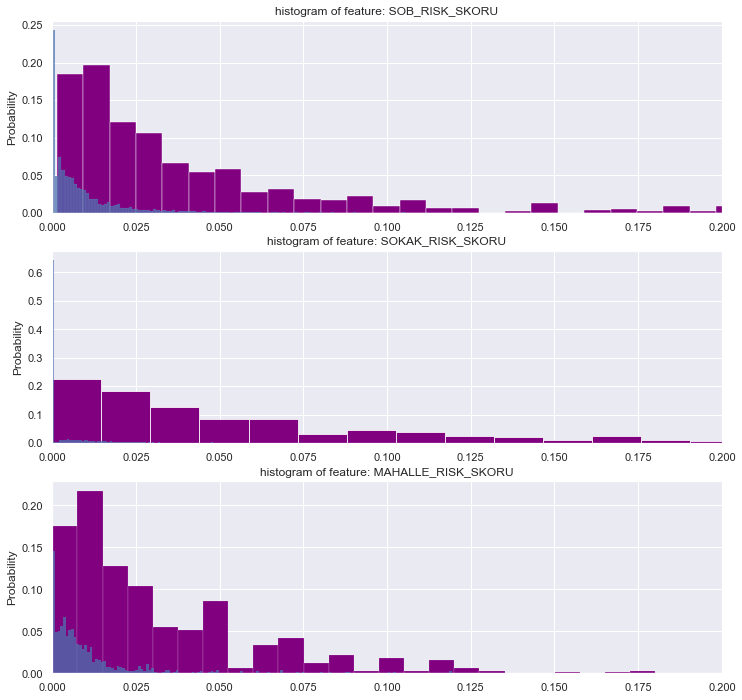

In [9]:
# risk skorlarının normal ve kaçaklara göre yüzdesel dağılımı : 
# morlar kaçak , maviler normal skor değerlerini temsil etmektedir 

features = df.iloc[:,36:39].columns
plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3, 1)
sns.set(style="darkgrid")

for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[c][df.NK_FLAG == 1],facecolor='purple',stat='probability')
    sns.histplot(df[c][df.NK_FLAG == 0],stat='probability')
    ax.set(xlim=(0.0, 0.2))
    ax.set_xlabel("")
    ax.set_title("histogram of feature: " + str(c))
    
plt.show()

In [10]:
# veri setindeki kaçak-normal vakalarının sayısı:

Theft = df[df["NK_FLAG"] == 1]
Normal = df[df["NK_FLAG"] == 0]
outlier_fraction = len(Theft)/float(len(Normal))
print(outlier_fraction)

print("Theft Cases: {}".format(len(df[df["NK_FLAG"] == 1])))
print("Normal Cases: {}".format(len(df[df["NK_FLAG"] == 0])))

0.07296137339055794
Theft Cases: 1020
Normal Cases: 13980


In [11]:
# Kaçak olanların istatistiksel özeti: 

Theft.describe()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,SOB_RISK_SKORU,SOKAK_RISK_SKORU,MAHALLE_RISK_SKORU,SAYAC_MALZEME_ID,NK_FLAG
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,875.000000,899.000000,863.000000,877.000000,761.000000,1020.000000,1020.000000,1020.000000,1.001000e+03,1020.0
mean,179.146113,360.227878,354.183113,477.274298,497.476718,460.326891,497.433583,466.208496,479.387519,516.591340,...,2.472215,2.602399,2.764284,2.686775,2.758773,0.041181,0.074964,0.037850,8.000085e+07,1.0
std,1515.467108,2941.699861,1879.264488,5235.711019,4951.825480,3970.396123,4323.404578,4020.462564,4090.568252,5022.781256,...,2.944538,3.049828,3.206830,3.054076,3.903875,0.056593,0.117046,0.094491,2.376317e+02,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001410,0.000000,0.000000,8.000001e+07,1.0
25%,18.899491,66.989518,71.173577,71.716613,72.620364,70.352983,72.581398,75.686201,79.762092,82.683168,...,0.748000,0.855000,0.926000,0.892000,0.900000,0.011342,0.016367,0.010243,8.000073e+07,1.0
50%,52.564483,137.648661,139.321152,140.621060,136.046113,137.899617,138.998266,141.114824,147.219509,150.633974,...,1.772000,1.904000,1.944000,1.972000,1.948000,0.024691,0.039548,0.020772,8.000099e+07,1.0
75%,126.847555,238.756775,258.891861,261.773752,254.779312,246.303059,256.671813,250.063882,249.590449,262.152276,...,3.382000,3.560000,3.590000,3.592000,3.599000,0.051067,0.090909,0.048061,8.000100e+07,1.0
max,47318.985000,90851.355000,47803.770000,162381.240000,111955.470968,95467.680000,110822.519806,112852.579355,98479.082839,142768.472000,...,45.014000,48.259000,43.868000,43.868000,74.217000,1.127251,1.157895,2.672043,8.000102e+07,1.0


In [12]:
# Normal olanların istatistiksel özeti: 

Normal.describe()

,TUKETIM_M1,TUKETIM_M2,TUKETIM_M3,TUKETIM_M4,TUKETIM_M5,TUKETIM_M6,TUKETIM_M7,TUKETIM_M8,TUKETIM_M9,TUKETIM_M10,...,DEMAND_M8,DEMAND_M9,DEMAND_M10,DEMAND_M11,DEMAND_M12,SOB_RISK_SKORU,SOKAK_RISK_SKORU,MAHALLE_RISK_SKORU,SAYAC_MALZEME_ID,NK_FLAG
count,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,13980.000000,...,11368.000000,12867.000000,11379.000000,12815.000000,11064.000000,13980.000000,13980.000000,13980.000000,1.394900e+04,13980.0
mean,90.157235,194.724206,214.482507,198.180059,161.111998,164.273663,194.935111,232.770723,214.916473,182.467761,...,2.431069,2.276961,2.571260,2.649968,5.050639,0.010657,0.011038,0.013787,8.000064e+07,0.0
std,157.176233,256.419386,283.978237,256.939062,225.194025,243.229372,283.994202,341.772098,323.337568,269.970852,...,2.003588,1.809481,1.900447,7.151475,211.247901,0.021806,0.135630,0.058876,3.212070e+02,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+07,0.0
25%,18.645520,67.547031,72.586798,71.204564,69.993584,72.772929,79.216447,82.953528,77.590416,73.792909,...,1.168000,1.086000,1.556000,1.456000,1.695750,0.001277,0.000000,0.002436,8.000052e+07,0.0
50%,58.281583,148.475007,158.150855,153.913223,136.998436,138.667520,151.969572,169.466705,157.555720,144.739343,...,2.294500,2.172000,2.388000,2.316000,2.652000,0.005070,0.000000,0.006098,8.000073e+07,0.0
75%,119.437881,244.690295,267.499987,251.083536,202.218509,200.501062,237.257880,289.946095,262.031899,222.701860,...,3.356000,3.096000,3.376000,3.376000,4.120000,0.012310,0.007634,0.012087,8.000085e+07,0.0
max,10947.406000,11678.093000,13121.282000,11210.875000,13038.124000,13760.063000,14954.813000,18354.625000,14763.202000,14122.376000,...,56.088000,32.356000,30.088000,777.215000,22222.000000,1.127251,14.264706,4.208696,8.000103e+07,0.0


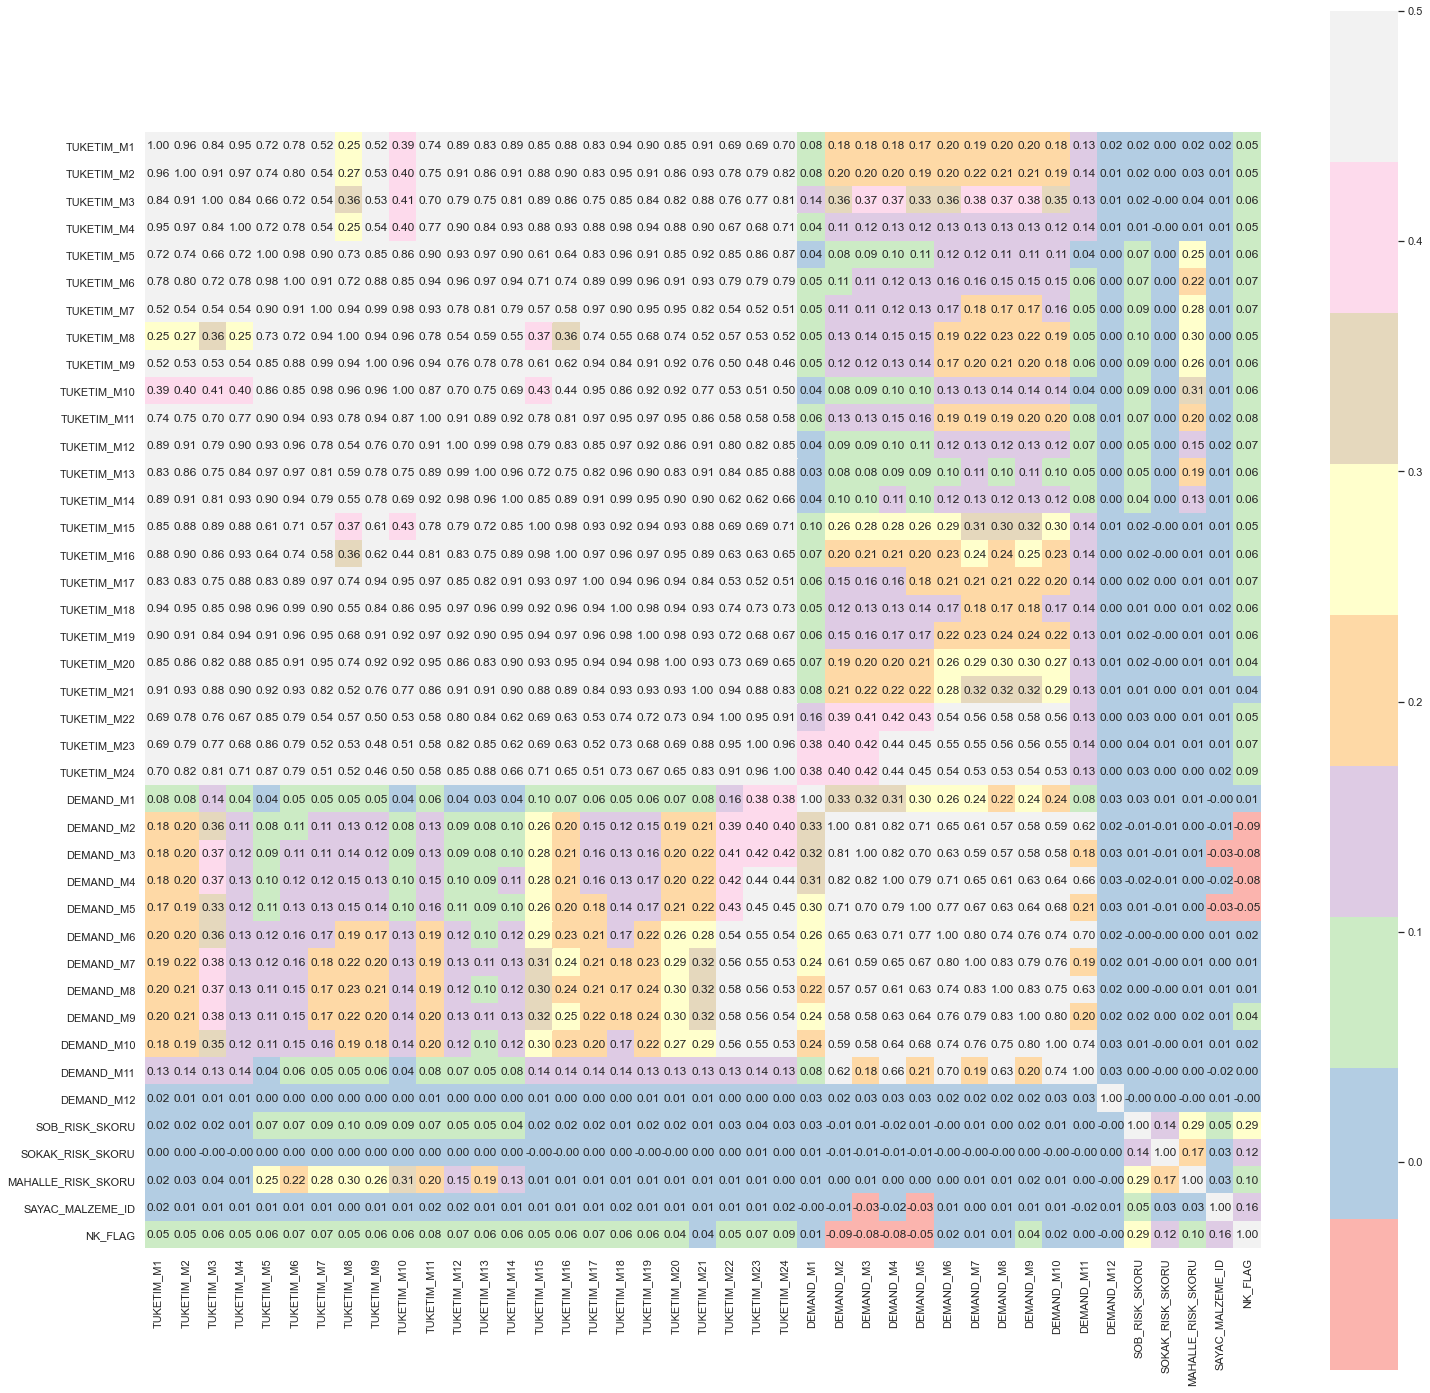

In [13]:
# Korelasyon Matrisi:

corrmat = df.corr()
fig = plt.figure(figsize = (25, 25))
sns.heatmap(corrmat, vmax = .5, square = True, annot=True,fmt='.2f',cmap="Pastel1")
plt.show()

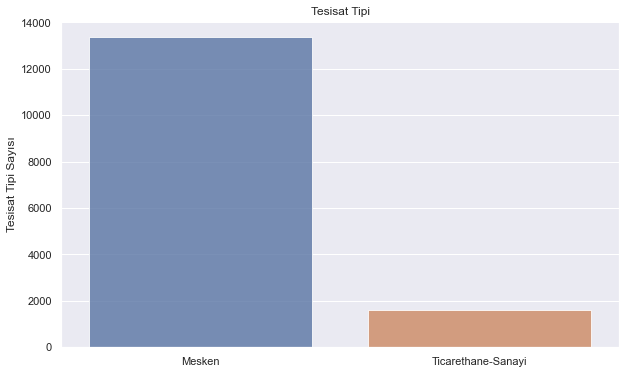

In [14]:
# "TESISAT_TIPI" kaçak ve normal sınıflarına göre gözlem sayıları :

tesisat_list = df.TESISAT_TIPI.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(tesisat_list.index, tesisat_list.values, alpha=0.8)
plt.title('Tesisat Tipi')
plt.ylabel('Tesisat Tipi Sayısı', fontsize=12);

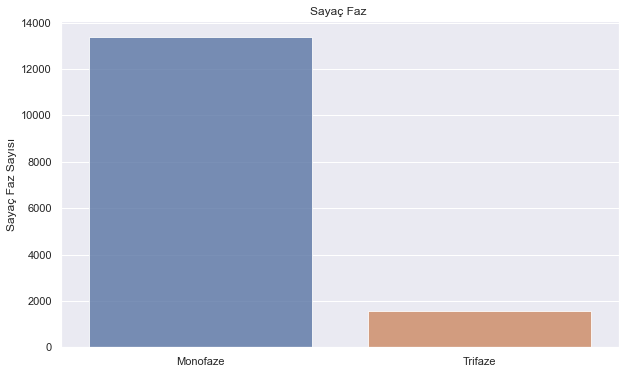

In [15]:
# "SAYAC_FAZ_N" kaçak ve normal sınıflarına göre gözlem sayıları 

sayac_faz_list = df.SAYAC_FAZ_N.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(sayac_faz_list.index, sayac_faz_list.values, alpha=0.8)
plt.title('Sayaç Faz ')
plt.ylabel('Sayaç Faz Sayısı', fontsize=12);

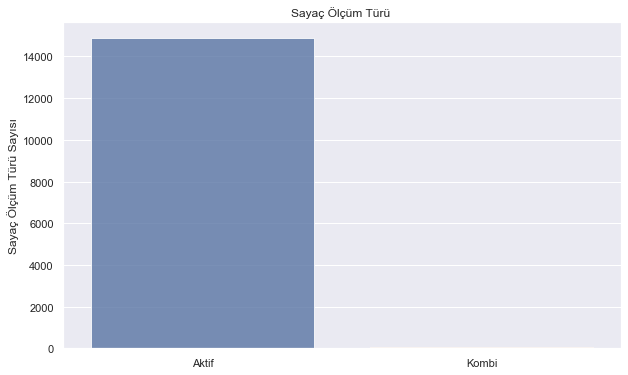

In [16]:
# "SAYAC_OLCUM_TURU" kaçak ve normal sınıflarına göre gözlem sayıları 

sayac_olcum_list = df.SAYAC_OLCUM_TURU.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(sayac_olcum_list.index, sayac_olcum_list.values, alpha=0.8)
plt.title('Sayaç Ölçüm Türü ')
plt.ylabel('Sayaç Ölçüm Türü Sayısı', fontsize=12);

In [17]:
# mesken ve sanayi verilerini kaçak ve normal şeklinde ayırarak veri setleri oluşturma

tuketim = df.iloc[:,0:24]
kacak_mesken = df[(df["TESISAT_TIPI"] == "Mesken") & (df["NK_FLAG"] == 1)][tuketim.columns]
legal_mesken = df[(df["TESISAT_TIPI"] == "Mesken") & (df["NK_FLAG"] == 0)][tuketim.columns]
kacak_sanayi = df[(df["TESISAT_TIPI"] == "Ticarethane-Sanayi") & (df["NK_FLAG"] == 1)][tuketim.columns]
legal_sanayi = df[(df["TESISAT_TIPI"] == "Ticarethane-Sanayi") & (df["NK_FLAG"] == 0)][tuketim.columns]

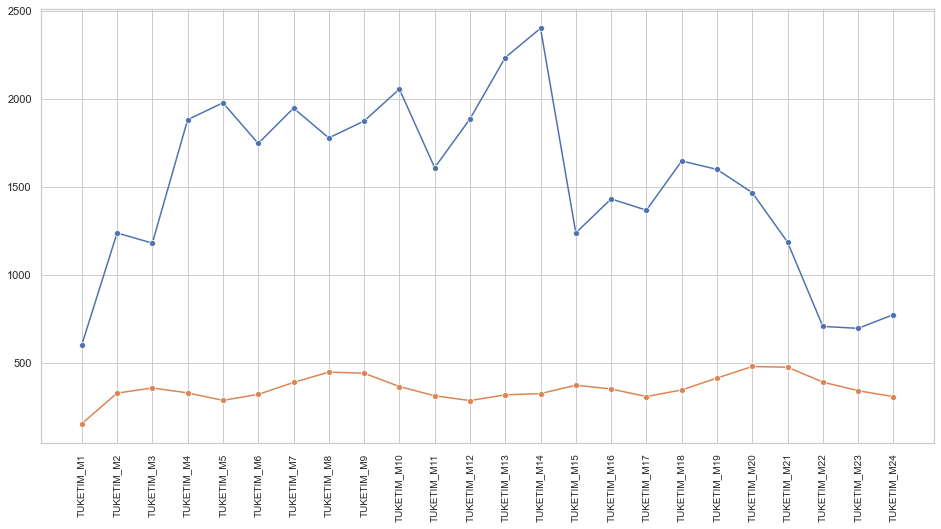

In [22]:
# kaçak sanayi ve normal sanayi veri setlerinin ortalama tüketim değerlerinin karşılaştırması

fig, ax = plt.subplots(figsize=(16,8))
sns.set_style("whitegrid")
sns.lineplot(data = kacak_sanayi.mean(), marker = "o", legend="auto")
sns.lineplot(data = legal_sanayi.mean(), marker = "o", legend="auto")
ax.tick_params(axis = 'x', labelsize = 10, labelrotation = 90)

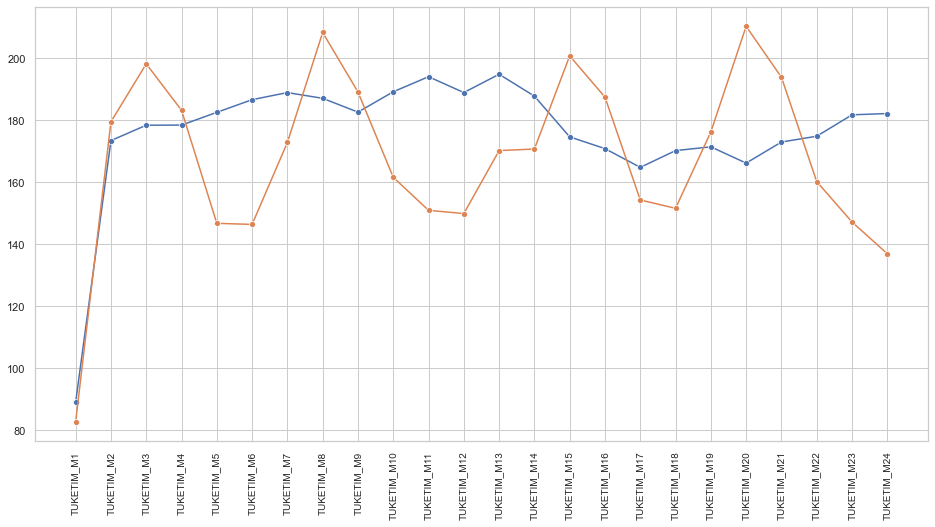

In [19]:
# kaçak mesken ve normal mesken veri setlerinin ortalama tüketim değerlerinin karşılaştırması

fig, ax = plt.subplots(figsize=(16,8))
sns.set_style("whitegrid")
sns.lineplot(data = kacak_mesken.mean(), marker = "o", legend="auto")
sns.lineplot(data = legal_mesken.mean(), marker = "o")
ax.tick_params(axis = 'x', labelsize = 10, labelrotation = 90)

In [20]:
## NK_FLAG ve bağımsız değişkenler arasındaki korelasyon değerleri (ilk 20) :

corr = df.corr()['NK_FLAG'].sort_values(ascending=False)

print(corr.head(20))

NK_FLAG               1.000000
SOB_RISK_SKORU        0.286425
SAYAC_MALZEME_ID      0.157626
SOKAK_RISK_SKORU      0.118857
MAHALLE_RISK_SKORU    0.097332
TUKETIM_M24           0.086112
TUKETIM_M11           0.084845
TUKETIM_M6            0.070063
TUKETIM_M23           0.069600
TUKETIM_M17           0.069507
TUKETIM_M12           0.066194
TUKETIM_M7            0.065523
TUKETIM_M5            0.064563
TUKETIM_M14           0.063171
TUKETIM_M10           0.062890
TUKETIM_M3            0.062533
TUKETIM_M18           0.061766
TUKETIM_M9            0.059825
TUKETIM_M19           0.058036
TUKETIM_M13           0.057484
Name: NK_FLAG, dtype: float64


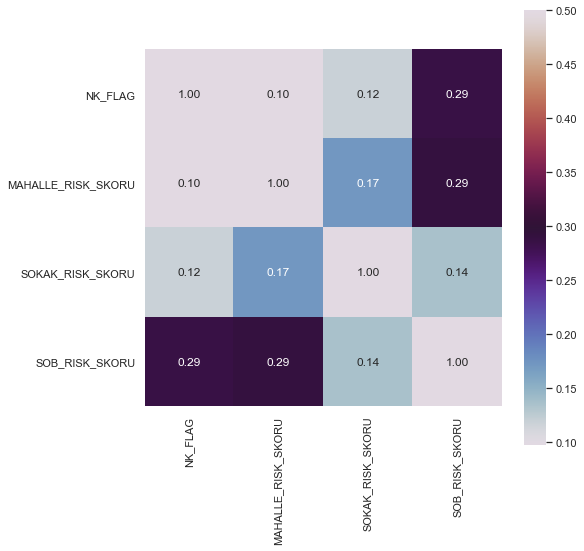

In [21]:
## NK_FLAG ve risk skorları arasındaki korelasyon matrisi :

risk_score_df = df[['NK_FLAG', 'MAHALLE_RISK_SKORU', 'SOKAK_RISK_SKORU', 'SOB_RISK_SKORU']]
risk_score_corr = risk_score_df.corr()

plt.figure(figsize = (8, 8))
sns.heatmap(risk_score_corr, vmax = .5, square = True, annot=True,fmt='.2f',cmap="twilight")
plt.show()